<a href="https://colab.research.google.com/github/KaveeshaGallage/TourismDataAnalytics/blob/main/Review_on_tourism_data_2021_in_SL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TOURIST ARRIVALS TO SRI LANKA IN 2021
Reference - https://sltda.gov.lk/en/tourism-industry-report

In [ ]:
!pip install geopandas

In [ ]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving DetailsByCountryCSV.csv to DetailsByCountryCSV.csv


In [ ]:
df = pd.read_csv('DetailsByCountryCSV.csv',index_col=0)
df

,Number of tourists,Latitude,Longitude
Country of Residence,,,
India,56268,20.593684,78.962880
United Kingdom,16646,55.378051,-3.435973
China,2417,35.861660,104.195397
Germany,12442,51.165691,10.451526
Australia,4421,-25.274398,133.775136
...,...,...,...
Afghanistan,15,33.939110,67.709953
Bhutan,5,27.514162,90.433601
Nigeria,11,9.081999,8.675277


In [ ]:
df.isnull().sum()

Number of tourists    0
Latitude              1
Longitude             1
dtype: int64

In [ ]:
df = df.dropna()
df

,Number of tourists,Latitude,Longitude
Country of Residence,,,
India,56268,20.593684,78.962880
United Kingdom,16646,55.378051,-3.435973
China,2417,35.861660,104.195397
Germany,12442,51.165691,10.451526
Australia,4421,-25.274398,133.775136
...,...,...,...
Sudan,97,12.862807,30.217636
Afghanistan,15,33.939110,67.709953
Bhutan,5,27.514162,90.433601


In [ ]:
geo_df = geopandas.GeoDataFrame(df, geometry = geopandas.points_from_xy(df.Longitude, df.Latitude))
geo_df

,Number of tourists,Latitude,Longitude,geometry
Country of Residence,,,,
India,56268,20.593684,78.962880,POINT (78.96288 20.59368)
United Kingdom,16646,55.378051,-3.435973,POINT (-3.43597 55.37805)
China,2417,35.861660,104.195397,POINT (104.19540 35.86166)
Germany,12442,51.165691,10.451526,POINT (10.45153 51.16569)
Australia,4421,-25.274398,133.775136,POINT (133.77514 -25.27440)
...,...,...,...,...
Sudan,97,12.862807,30.217636,POINT (30.21764 12.86281)
Afghanistan,15,33.939110,67.709953,POINT (67.70995 33.93911)
Bhutan,5,27.514162,90.433601,POINT (90.43360 27.51416)


In [ ]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 79 entries, India to Comoros
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Number of tourists  79 non-null     int64   
 1   Latitude            79 non-null     float64 
 2   Longitude           79 non-null     float64 
 3   geometry            79 non-null     geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 3.1+ KB


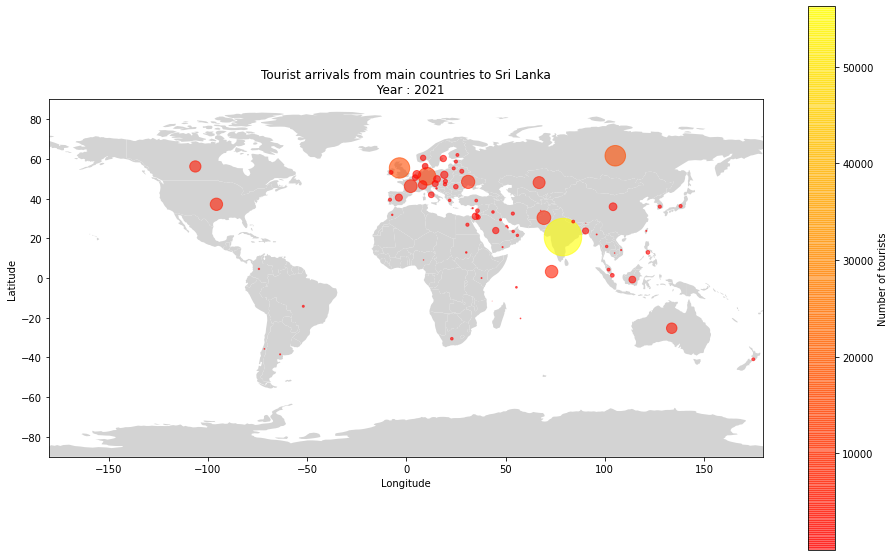

In [ ]:
# Getting world map data from geo pandas
worldmap = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting tourist source markets with a color map
x = geo_df['Longitude']
y = geo_df['Latitude']
z = geo_df['Number of tourists']
plt.scatter(x, y, 
              s=0.025*z,
              c=z,
              alpha=0.6,             
              cmap='autumn'
            )
plt.colorbar(label='Number of tourists')

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title("Tourist arrivals from main countries to Sri Lanka\n  Year : 2021")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
df_new = df.sort_values(by = "Number of tourists", ascending=False)
df_new

,Number of tourists,Latitude,Longitude,geometry
Country of Residence,,,,
India,56268,20.593684,78.962880,POINT (78.96288 20.59368)
Russia,16894,61.524010,105.318756,POINT (105.31876 61.52401)
United Kingdom,16646,55.378051,-3.435973,POINT (-3.43597 55.37805)
Germany,12442,51.165691,10.451526,POINT (10.45153 51.16569)
Pakistan,7520,30.375321,69.345116,POINT (69.34512 30.37532)
...,...,...,...,...
Afghanistan,15,33.939110,67.709953,POINT (67.70995 33.93911)
Cambodia,14,12.565679,104.990963,POINT (104.99096 12.56568)
Nigeria,11,9.081999,8.675277,POINT (8.67528 9.08200)
